In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/mojtabaeshghie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:

def label_selector(file_path:str):
    if file_path == 'erc20':
        return "ERC20"
    else:
        return "SoK"

In [11]:
def RQ1(file_path):

    # Load data from JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Flatten nested JSON structure
    flat_data = []
    for item in data:
        if isinstance(item, list):  # Handle list of lists
            flat_data.extend(item)
        else:
            flat_data.append(item)

    # Convert to DataFrame
    df = pd.DataFrame(flat_data)

    # Calculate total and average times
    total_parsing_time = df['total_parsing_time'].sum()
    total_reduction_time = df['total_reduction_time'].sum()
    average_parsing_time = df['total_parsing_time'].mean()
    average_reduction_time = df['total_reduction_time'].mean()
    average_reduction_ratio = round(df['reduction_ratio'].mean(),2)
    predicates_removed = df["predicates_before_reduction"].sum() - df["predicates_after_reduction"].sum()
    average_predicates_removed = predicates_removed / len(df)

    # Print calculated values
    print(f"Total Parsing Time: {total_parsing_time}")
    print(f"Total Reduction Time: {total_reduction_time}")
    print(f"Average Parsing Time: {average_parsing_time}")
    print(f"Average Reduction Time: {average_reduction_time}")
    print(f"Average Reduction Ratio: {average_reduction_ratio}")
    print(f"Average predicates removed: {average_predicates_removed}")
    print(f"Total predicates removed: {predicates_removed}")

    # Generate histogram for reduction ratio with custom ticks and no grid
    num_bins = 4
    counts, bins, patches = plt.hist(df['reduction_ratio'], bins=num_bins, edgecolor='black', alpha=0.8, align='mid')

    # Set the x-ticks to be at the center of each bin
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.xticks(bin_centers, [f"{center:.2f}" for center in bin_centers])



    # Set the x-ticks to be at the center of each bin, with 0.65 instead of 0.66
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    custom_ticks = [f"{center:.2f}" for center in bin_centers]
    if file_path == 'sok':
        custom_ticks[0] = '0.65'  # Change the first tick to 0.65

    plt.xticks(bin_centers, custom_ticks)

    # Set labels and title
    plt.xlabel('Reduction Ratio',  fontsize=14)
    plt.ylabel('Frequency' ,fontsize=14)
    # plt.title(f'Histogram of Reduction Ratios {label_selector(file_path)} for Smart Contract', fontsize=16)

    # Turn off the grid
    plt.grid(False)

    # Save and show the plot
    plt.savefig(f'reduction_ratio_histogram_{file_path.replace("/", "_").replace(".json", "")}.pdf', format='pdf', dpi=300)
    plt.clf()


if __name__ == "__main__":
    RQ1("output_light/erc20.json")
    # print("_______________________________________________________________")
    RQ1("output_light/sok.json")

Total Parsing Time: 0.05190396308898926
Total Reduction Time: 10.079729557037354
Average Parsing Time: 0.0014417767524719238
Average Reduction Time: 0.279992487695482
Average Reduction Ratio: 0.8
Average predicates removed: 35.166666666666664
Total predicates removed: 1266
Total Parsing Time: 0.04531979560852051
Total Reduction Time: 17.858713150024414
Average Parsing Time: 0.0022659897804260254
Average Reduction Time: 0.8929356575012207
Average Reduction Ratio: 0.91
Average predicates removed: 57.8
Total predicates removed: 1156


<Figure size 640x480 with 0 Axes>

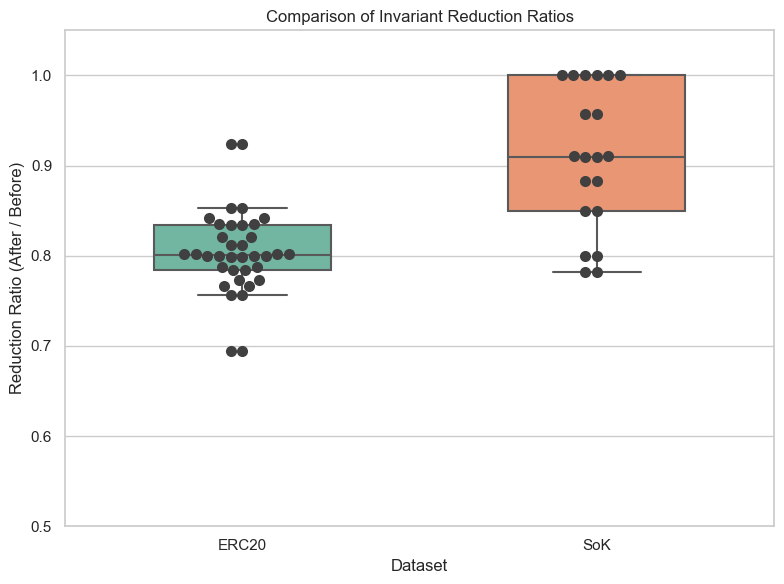

In [12]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from JSON files
with open('output_light/erc20.json', 'r') as f:
    erc20_data = json.load(f)
with open('output_light/sok.json', 'r') as f:
    sok_data = json.load(f)

# Convert JSON data into DataFrames and add a column to indicate the dataset source
erc20_df = pd.DataFrame(erc20_data)
erc20_df['Dataset'] = 'ERC20'
sok_df = pd.DataFrame(sok_data)
sok_df['Dataset'] = 'SoK'

# Combine the two DataFrames into one
df = pd.concat([erc20_df, sok_df], ignore_index=True)

# Set up the plot aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a boxplot to show distribution and a swarmplot for individual points
ax = sns.boxplot(x='Dataset', y='reduction_ratio', data=df, width=0.5, palette="Set2")
sns.swarmplot(x='Dataset', y='reduction_ratio', data=df, color='0.25', size=8)

# Set y-axis limits and labels
plt.ylim(0.5, 1.05)
plt.ylabel("Reduction Ratio (After / Before)")
plt.title("Comparison of Invariant Reduction Ratios")

plt.tight_layout()
plt.savefig("combined_reduction_ratios.png")
plt.show()

In [13]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load JSON data
with open('erc20.json', 'r') as f:
    erc20_data = json.load(f)
with open('sok.json', 'r') as f:
    sok_data = json.load(f)

# Convert to DataFrame and label
erc20_df = pd.DataFrame(erc20_data)
erc20_df['Dataset'] = 'ERC20'

sok_df = pd.DataFrame(sok_data)
sok_df['Dataset'] = 'SoK'

# Combine into a single DataFrame
df = pd.concat([erc20_df, sok_df], ignore_index=True)

# Compute percentage of invariants removed
# If reduction_ratio = (predicates_after / predicates_before),
# then the fraction removed is 1 - reduction_ratio,
# multiplied by 100 for percentage.
df['percentage_removed'] = (1 - df['reduction_ratio']) * 100

# Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a violin plot for distribution + strip plot for individual data points
sns.violinplot(x='Dataset', y='percentage_removed', data=df, palette="Set2", cut=0)
sns.stripplot(x='Dataset', y='percentage_removed', data=df, color='0.3', size=6)

# Labeling and styling
plt.ylim(0, 100)  # percentage from 0% to 100%
plt.ylabel("Percentage of Invariants Removed (%)")
plt.title("Comparison of Invariant Reduction (Percentage Removed)")
plt.tight_layout()

# Save or show
plt.savefig("percentage_removed_comparison.png", dpi=300)
plt.show()


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [14]:
sns.boxplot(x='Dataset', y='percentage_removed', data=df, palette="Set2")
sns.stripplot(x='Dataset', y='percentage_removed', data=df, color='0.3', size=6)

ValueError: Could not interpret input 'percentage_removed'

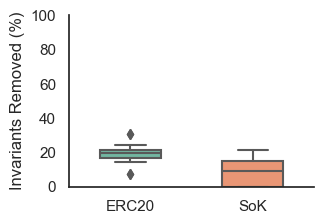

In [15]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
with open('output_light/erc20.json', 'r') as f:
    erc20_data = json.load(f)
with open('output_light/sok.json', 'r') as f:
    sok_data = json.load(f)

# 2. Convert to DataFrame and label
erc20_df = pd.DataFrame(erc20_data)
erc20_df['Dataset'] = 'ERC20'

sok_df = pd.DataFrame(sok_data)
sok_df['Dataset'] = 'SoK'

# 3. Combine into a single DataFrame
df = pd.concat([erc20_df, sok_df], ignore_index=True)

# 4. Calculate percentage of invariants removed
df['percentage_removed'] = (1 - df['reduction_ratio']) * 100

# 5. Prepare for plotting
sns.set_style("white")  # no grid lines
plt.figure(figsize=(3.4, 2.4))  # adjust for double-column width (~3.4 inches)

# 6. Plot a simple box plot
sns.boxplot(
    x='Dataset',
    y='percentage_removed',
    data=df,
    palette="Set2",
    width=0.5
)

# 7. Remove top/right spines and finalize styling
sns.despine()  
plt.ylim(0, 100)
plt.xlabel("")  # remove or keep as desired
plt.ylabel("Invariants Removed (%)")
plt.tight_layout()

# 8. Save or display
plt.savefig("boxplot_invariants_removed.png", dpi=300)
plt.show()

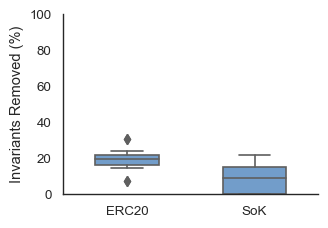

In [17]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load JSON data
with open('output_light/erc20.json', 'r') as f:
    erc20_data = json.load(f)
with open('output_light/sok.json', 'r') as f:
    sok_data = json.load(f)

# 2. Convert to DataFrame and label each row with its dataset
erc20_df = pd.DataFrame(erc20_data)
erc20_df['Dataset'] = 'ERC20'
sok_df = pd.DataFrame(sok_data)
sok_df['Dataset'] = 'SoK'

# 3. Combine into a single DataFrame
df = pd.concat([erc20_df, sok_df], ignore_index=True)

# 4. Calculate percentage of invariants removed
df['percentage_removed'] = (1 - df['reduction_ratio']) * 100

# 5. Set styles for small figure and minimal clutter
sns.set_context("paper", font_scale=1.1)  # smaller font
sns.set_style("white")                   # remove background grid lines

# 6. Create the figure sized for a double-column format (~3.4 inches wide)
plt.figure(figsize=(3.4, 2.4))

# 7. Plot a simple box plot with a professional blue color
sns.boxplot(
    x='Dataset',
    y='percentage_removed',
    data=df,
    width=0.5,
    color='#639CD9',     # professional blue fill
    linewidth=1.2        # slightly thicker line for clarity
)

# 8. Finalize layout and styling
sns.despine()  # remove top/right spines
plt.ylim(0, 100)
plt.xlabel("")  # remove x-axis label if desired
plt.ylabel("Invariants Removed (%)")
plt.tight_layout()

# 9. Save or display
plt.savefig("boxplot_invariants_removed.pdf", dpi=300)
plt.show()


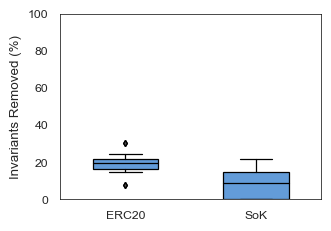

In [18]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load JSON data
with open('output_light/erc20.json', 'r') as f:
    erc20_data = json.load(f)
with open('output_light/sok.json', 'r') as f:
    sok_data = json.load(f)

# 2. Convert to DataFrame and label each row with its dataset
erc20_df = pd.DataFrame(erc20_data)
erc20_df['Dataset'] = 'ERC20'
sok_df = pd.DataFrame(sok_data)
sok_df['Dataset'] = 'SoK'

# 3. Combine into a single DataFrame
df = pd.concat([erc20_df, sok_df], ignore_index=True)

# 4. Calculate percentage of invariants removed
df['percentage_removed'] = (1 - df['reduction_ratio']) * 100

# 5. Set styles for small figure and minimal clutter
sns.set_context("paper", font_scale=1)
sns.set_style("white")  # clean white background

# 6. Create the figure sized for a double-column format (~3.4 inches wide)
plt.figure(figsize=(3.4, 2.4))

# 7. Plot a box plot with professional blue fill and black outlines
ax = sns.boxplot(
    x='Dataset',
    y='percentage_removed',
    data=df,
    width=0.5,
    boxprops={'facecolor': '#639CD9', 'edgecolor': 'black', 'linewidth': 0.9},
    whiskerprops={'color': 'black', 'linewidth': 0.9},
    capprops={'color': 'black', 'linewidth': 0.9},
    medianprops={'color': 'black', 'linewidth': 0.9},
    flierprops={'markeredgecolor': 'black', 'markersize': 3}
)

# 8. Ensure all four spines of the plot are visible with black borders
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')

plt.ylim(0, 100)
plt.xlabel("")
plt.ylabel("Invariants Removed (%)")
plt.tight_layout()

# 9. Save or display the figure
plt.savefig("boxplot_invariants_removed.pdf", dpi=300)
plt.show()

